# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
### <span style='font-family:"Times New Roman"'>In this problem, the filtering of added noise in spatial domain is considered. 
### <span style='font-family:"Times New Roman"'>    First uniform noise and then salt and pepper noise are added to image. Then effectiveness of Arithmetic mean filter, Geometric mean filter, Median filter, and Alpha-trimmed mean filter in removing noise is considered. 

# <span style='font-family:"Times New Roman"'>Loading Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
I = mpimg.imread('circuitboard.tif')

In [3]:
def add_uniform_noise(I,a,b):
    row,col= I.shape
    uniform = np.random.uniform(a,b,(row,col))
    eta = uniform.reshape(row,col)
    g = I + eta
    return g, eta

In [4]:
def add_sp_noise(I,ps,pp):
    g = I.flatten()
    eta = np.zeros(I.size)
    indicesps = np.random.choice(np.arange(g.size), replace=False, size=int(g.size * ps))
    g[indicesps] = 0
    eta[indicesps] = 0
    indicespp = np.random.choice(np.arange(g.size), replace=False, size=int(g.size * pp))
    g[indicespp] = 255
    eta[indicesps] = 255
    return g, eta

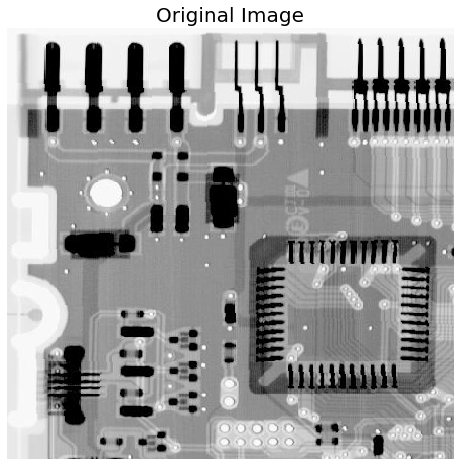

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(I, cmap = 'gray')
plt.title('Original Image', fontsize = 20)
plt.axis('off')
plt.show()

In [6]:
gup , eta = add_uniform_noise(I,0,80)
gup = gup - np.amin(gup)
gup = (gup/(np.amax(gup))) * 255

In [7]:
gsp ,eta = add_sp_noise(I,0.1,0.1)
gsp = np.reshape(gsp, I.shape)

In [8]:
gu , eta = add_uniform_noise(gsp,0,80)
gu = gu - np.amin(gu)
gu = (gu/(np.amax(gu))) * 255

In [9]:
KS = 5 #Kernel size
m = int(KS/2) 
gu_padded = np.pad(gu, ((m,m),(m,m)), 'constant', constant_values = 0)   #zero padding 

### <span style='font-family:"Times New Roman"'> Arithmetic Mean Filter

In [10]:
c, r  = gu_padded.shape
ha = np.zeros(gu_padded.shape)
for j in range (0,c+1):
    for n in range (0,r+1):
        f = (1/KS*KS)*np.sum(gu_padded[KS*j:KS*j+KS,KS*n:KS*n+KS])
        ha[KS*j:KS*j+KS,KS*n:KS*n+KS] = f
ha = np.delete(ha, range(KS-1), axis=1)
ha = np.delete(ha, range(r, r + (KS-1)), axis=1)
ha = np.delete(ha, range(KS-1), axis=0)
ha = np.delete(ha, range(c, c + KS-1), axis=0)
#removing the zero pads 

C:\Users\sinaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  
C:\Users\sinaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  # Remove the CWD from sys.path while we load stuff.


### <span style='font-family:"Times New Roman"'> Geometric Mean Filter 

In [11]:
hg = np.zeros(gu_padded.shape)
for j in range (0,c+1):
    for n in range (0,r+1):
        f = (np.prod(gu_padded[KS*j:KS*j+KS,KS*n:KS*n+KS]))**(1/25)
        hg[KS*j:KS*j+KS,KS*n:KS*n+KS] = f
hg = np.delete(hg, range(KS-1), axis=1)
hg = np.delete(hg, range(r, r + (KS-1)), axis=1)
hg = np.delete(hg, range(KS-1), axis=0)
hg = np.delete(hg, range(c, c + KS-1), axis=0)

C:\Users\sinaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  import sys
C:\Users\sinaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if __name__ == '__main__':


### <span style='font-family:"Times New Roman"'> Median Filter 

In [12]:
hme = np.zeros(gu_padded.shape)
for j in range (0,c+1):
    for n in range (0,r+1):
        f = np.median(gu_padded[KS*j:KS*j+KS,KS*n:KS*n+KS])
        hme[KS*j:KS*j+KS,KS*n:KS*n+KS] = f
hme = np.delete(hme, range(KS-1), axis=1)
hme = np.delete(hme, range(r, r + (KS-1)), axis=1)
hme = np.delete(hme, range(KS-1), axis=0)
hme = np.delete(hme, range(c, c + KS-1), axis=0)

C:\Users\sinaz\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\sinaz\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\sinaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  import sys
C:\Users\sinaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if __name__ == '__main__':


### <span style='font-family:"Times New Roman"'> Alpha-Trimmed Mean Filter

In [13]:
hat = np.zeros(gu_padded.shape)
for j in range (0,c+1):
    for n in range (0,r+1):
        f = gu_padded[KS*j:KS*j+KS,KS*n:KS*n+KS]
        fflat = np.sort(f.flatten())
        fflat[0:2] = 0
        fflat[22:24] = 0
        hat[KS*j:KS*j+KS,KS*n:KS*n+KS] = np.sum(fflat)/19
hat = np.delete(hat, range(KS-1), axis=1)
hat = np.delete(hat, range(r, r + (KS-1)), axis=1)
hat = np.delete(hat, range(KS-1), axis=0)
hat = np.delete(hat, range(c, c + KS-1), axis=0)

C:\Users\sinaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sinaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


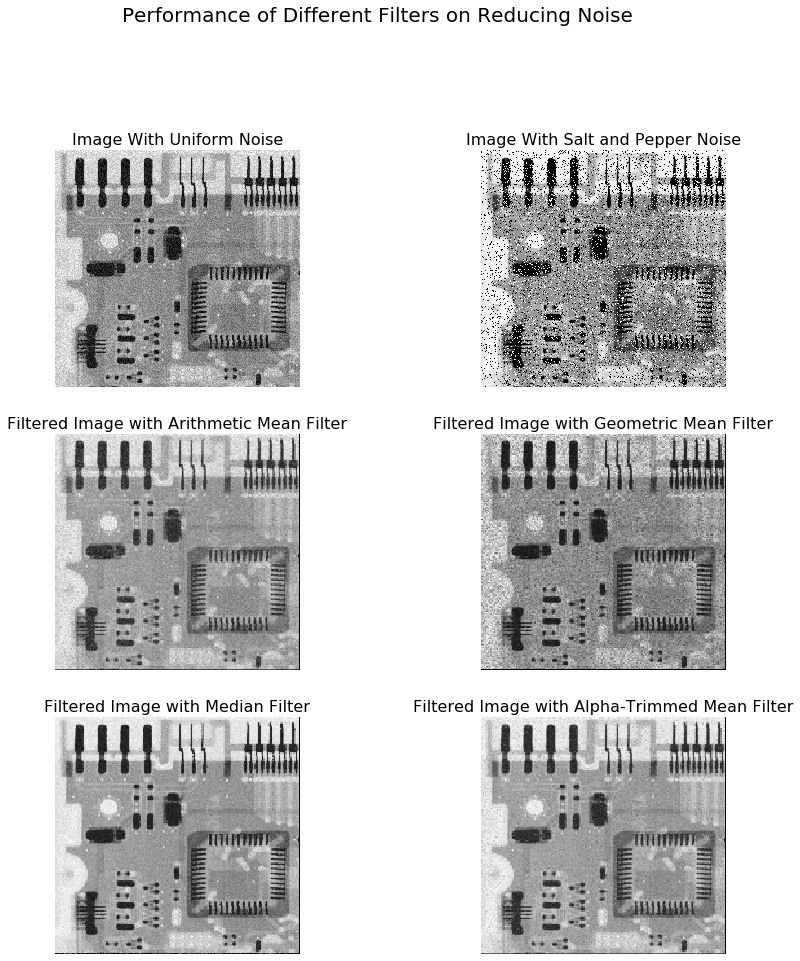

In [14]:
fig = plt.figure(figsize=(14, 20))
plt.subplot(4, 2, 1)
img=plt.imshow(gup,cmap = 'gray')
plt.title('Image With Uniform Noise', fontsize = 16)
plt.axis('off')
plt.subplot(4, 2, 2)
plt.imshow(gsp,cmap = 'gray')
plt.title('Image With Salt and Pepper Noise', fontsize = 16)
plt.axis('off')
plt.subplot(4, 2, 3)
plt.imshow(ha,cmap = 'gray')
plt.title('Filtered Image with Arithmetic Mean Filter', fontsize = 16)
plt.axis('off')
plt.subplot(4, 2, 4)
plt.imshow(hg,cmap = 'gray')
plt.title('Filtered Image with Geometric Mean Filter', fontsize = 16)
plt.axis('off')
plt.subplot(4, 2, 5)
plt.imshow(hme,cmap = 'gray')
plt.title('Filtered Image with Median Filter', fontsize = 16)
plt.axis('off')
plt.subplot(4, 2, 6)
plt.imshow(hat,cmap = 'gray')
plt.title('Filtered Image with Alpha-Trimmed Mean Filter', fontsize = 16)
plt.axis('off')
fig.suptitle('Performance of Different Filters on Reducing Noise', fontsize = 20)
plt.show()

<span style='font-family:"Times New Roman"'> In this problem, we add to sets of noise to an intact image. Both uniform noise and salt and pepper noise are added to image.
Then, different filters are implemented to see the effect of each of them on noisy image. 
Arithmetic Mean Filter: Slightly better than geometric mean filter, the performance of this filter is still bad compared to median filters. 
Geometric Mean Filter: The worst performance in reducing noise belongs to this filter. This filter did a poor job compared to other filters.
Median Filter: Did a good job in smoothing the noise, and results are much better than arithmetic and geometric mean filters.
Alpha-Trimmed Mean Filter: Since, it is cutting the lowest and highest values in neighborhood and finds a median, it was expected to do a better job compared to median filter. Alpha-Trimmed Mean Filter has the best performance compared to all the other filters in this problem.   